In [1]:
IMAGE_SIZE = 150
ZISE_OF_IMAGES = 3000
CLASSES = ['happy', 'sad']
DRIVE_PATH = '/content/drive'
PATH = DRIVE_PATH + "/MyDrive/deep-learning/data/images/"

In [2]:
from google.colab import drive
drive.mount(DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# modeling
import tensorflow.compat.v1 as tf
import tensorflow_datasets as tfds
tf.disable_v2_behavior()
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# tools
import os
import glob
import random
import numpy as np
from tqdm import tqdm

# others
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
def load_data(classes):
  images = []
  labels = []
  files = []
  for i in range(len(classes)):
    folder_name = classes[i]
    path = os.path.join(PATH, folder_name, '*g')
    for file_index, file_name in enumerate(glob.glob(path)):
        image = cv2.imread(file_name)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE)) 
        images.append(image)
        label = [i] 
        labels.append(label)
        files.append(os.path.basename(file_name))
        if file_index == ZISE_OF_IMAGES:
          break
  return np.array(images), np.array(labels), files

In [5]:
def plot_images(images, cls_true, cls_pred=None):
    
    if len(images) == 0:
        print("no images to show")
        return 
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9))
        
    if cls_pred is not None:
        images, cls_true, cls_pred  = zip(*[(images[i], cls_true[i], cls_pred[i]) for i in random_indices])
    else:
        images, cls_true  = zip(*[(images[i], cls_true[i]) for i in random_indices])
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(IMAGE_SIZE, IMAGE_SIZE, 3))

        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [6]:
images, labels, files = load_data(CLASSES)
images, labels, files = shuffle(images, labels, files)  # shuffle the data

In [7]:
assert len(images) == len(labels)
assert len(labels) == len(files)

In [8]:
def split_train_test(test_size: float, images, labels, files):
  size_of_train = round(len(images) * test_size)
  train_images = images[0: size_of_train]
  train_labels = labels[0: size_of_train]
  train_files = files[0: size_of_train]

  test_images = images[size_of_train: -1]
  test_labels = labels[size_of_train: -1]
  test_files = files[size_of_train: -1]

  return [train_images, train_labels, train_files], [test_images, test_labels, test_files]

In [9]:
train, test = split_train_test(test_size=0.8, images=images, labels=labels, files=files)
train_images, train_labels, train_files = train[:]
test_images, test_labels, test_files = test[:]

In [10]:
assert len(train_images) == len(train_labels)
assert len(train_labels) == len(train_files)
assert len(test_images) == len(test_labels)
assert len(test_labels) == len(test_files)

In [11]:
train_images.shape

(4802, 150, 150, 3)

In [12]:
len_features = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]

In [13]:
len_features

67500

In [14]:
train_images = train_images.reshape(len(train_images), len_features)
test_images = test_images.reshape(len(test_images), len_features)

In [15]:
eps = 1e-12
x = tf.placeholder(tf.float32, [None,  len_features])      
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([len_features,1]))
b = tf.Variable(tf.zeros([1]))
pred = 1 / (1.0 + tf.exp(-(tf.matmul(x,W) + b)))
loss1 = -(y_ * tf.log(pred + eps) + (1 - y_) * tf.log(1- pred + eps))
loss = tf.reduce_mean(loss1)
update = tf.train.GradientDescentOptimizer(0.00000000001).minimize(loss)
# data_x = np.array([convert2vec(data[0]), convert2vec(data[1]), convert2vec(data[2]), convert2vec(data[3])])
data_x = train_images
data_y = train_labels

sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss_array = []
epoch_array = []
for i in tqdm(range(0,10000)):
  # print(i, sess.run(accuracy, feed_dict={x: mnist.test.train_images, y_: mnist.test.labels}))
  accuracy = sess.run([update, loss], feed_dict = {x:data_x, y_:data_y})
  if i % 1000 == 0:
    print(f"\nAccuracy: {accuracy[1]:0.4}")
    loss_array.append(accuracy[1])
    epoch_array.append(i)

  0%|          | 1/10000 [00:01<4:01:25,  1.45s/it]


Accuracy: 0.6931


 10%|█         | 1001/10000 [07:17<1:04:28,  2.33it/s]


Accuracy: 0.6925


 20%|██        | 2001/10000 [14:24<56:12,  2.37it/s]


Accuracy: 0.692


 30%|███       | 3001/10000 [21:32<50:25,  2.31it/s]


Accuracy: 0.6916


 40%|████      | 4001/10000 [28:39<42:26,  2.36it/s]


Accuracy: 0.6912


 50%|█████     | 5001/10000 [35:43<34:50,  2.39it/s]


Accuracy: 0.6908


 60%|██████    | 6001/10000 [42:50<29:01,  2.30it/s]


Accuracy: 0.6904


 70%|███████   | 7001/10000 [49:57<20:57,  2.38it/s]


Accuracy: 0.69


 80%|████████  | 8001/10000 [57:02<14:06,  2.36it/s]


Accuracy: 0.6896


 90%|█████████ | 9001/10000 [1:04:08<07:05,  2.35it/s]


Accuracy: 0.6892


100%|██████████| 10000/10000 [1:11:11<00:00,  2.34it/s]


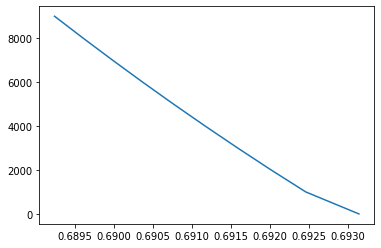

In [16]:
plt.plot(loss_array, epoch_array)

In [17]:
y_logits = tf.matmul(x, W) + b
y_hat = tf.round(tf.sigmoid(y_logits))
y_pred = sess.run(y_hat, feed_dict = {x: test_images, y_: test_labels})
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.84      0.64       598
           1       0.58      0.22      0.32       601

    accuracy                           0.53      1199
   macro avg       0.55      0.53      0.48      1199
weighted avg       0.55      0.53      0.48      1199



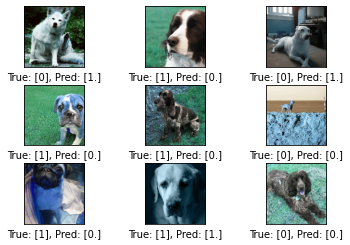

In [18]:
plot_images(test_images, test_labels, y_pred)